In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Бібліотека для роботи з часовими рядами
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

Зчитуємо датасет з трендом грипу у світі:

In [2]:
flu_df = pd.read_csv('flutrends.csv', index_col=['Date'], parse_dates=['Date'])
flu_df

,Argentina,Australia,Austria,Belgium,Bolivia,Brazil,Bulgaria,Canada,Chile,France,...,Poland,Romania,Russia,South Africa,Spain,Sweden,Switzerland,Ukraine,United States,Uruguay
Date,,,,,,,,,,,,,,,,,,,,,
2002-12-29,NaN,NaN,NaN,NaN,NaN,174,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-05,NaN,NaN,NaN,NaN,NaN,162,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-12,NaN,NaN,NaN,NaN,NaN,174,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-19,NaN,NaN,NaN,NaN,NaN,162,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-26,NaN,NaN,NaN,NaN,NaN,131,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-07-12,240.0,1135.0,568.0,11.0,218.0,231,147.0,832.0,29.0,1.0,...,11.0,508.0,227.0,2963.0,6.0,1.0,24.0,199.0,770.0,215.0
2015-07-19,252.0,1274.0,506.0,10.0,223.0,213,138.0,722.0,29.0,1.0,...,10.0,508.0,247.0,2751.0,7.0,1.0,24.0,210.0,767.0,220.0
2015-07-26,235.0,1411.0,519.0,13.0,217.0,206,136.0,703.0,28.0,2.0,...,9.0,502.0,263.0,2967.0,7.0,2.0,19.0,200.0,666.0,225.0


In [3]:
flu_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 659 entries, 2002-12-29 to 2015-08-09
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Argentina      654 non-null    float64
 1   Australia      502 non-null    float64
 2   Austria        620 non-null    float64
 3   Belgium        620 non-null    float64
 4   Bolivia        651 non-null    float64
 5   Brazil         659 non-null    int64  
 6   Bulgaria       557 non-null    float64
 7   Canada         620 non-null    float64
 8   Chile          657 non-null    float64
 9   France         620 non-null    float64
 10  Germany        620 non-null    float64
 11  Hungary        561 non-null    float64
 12  Japan          616 non-null    float64
 13  Mexico         620 non-null    float64
 14  Netherlands    619 non-null    float64
 15  New Zealand    502 non-null    float64
 16  Norway         561 non-null    float64
 17  Paraguay       534 non-null    floa

Візуалізуємо динаміку грипу в часі в Україні та Польші:

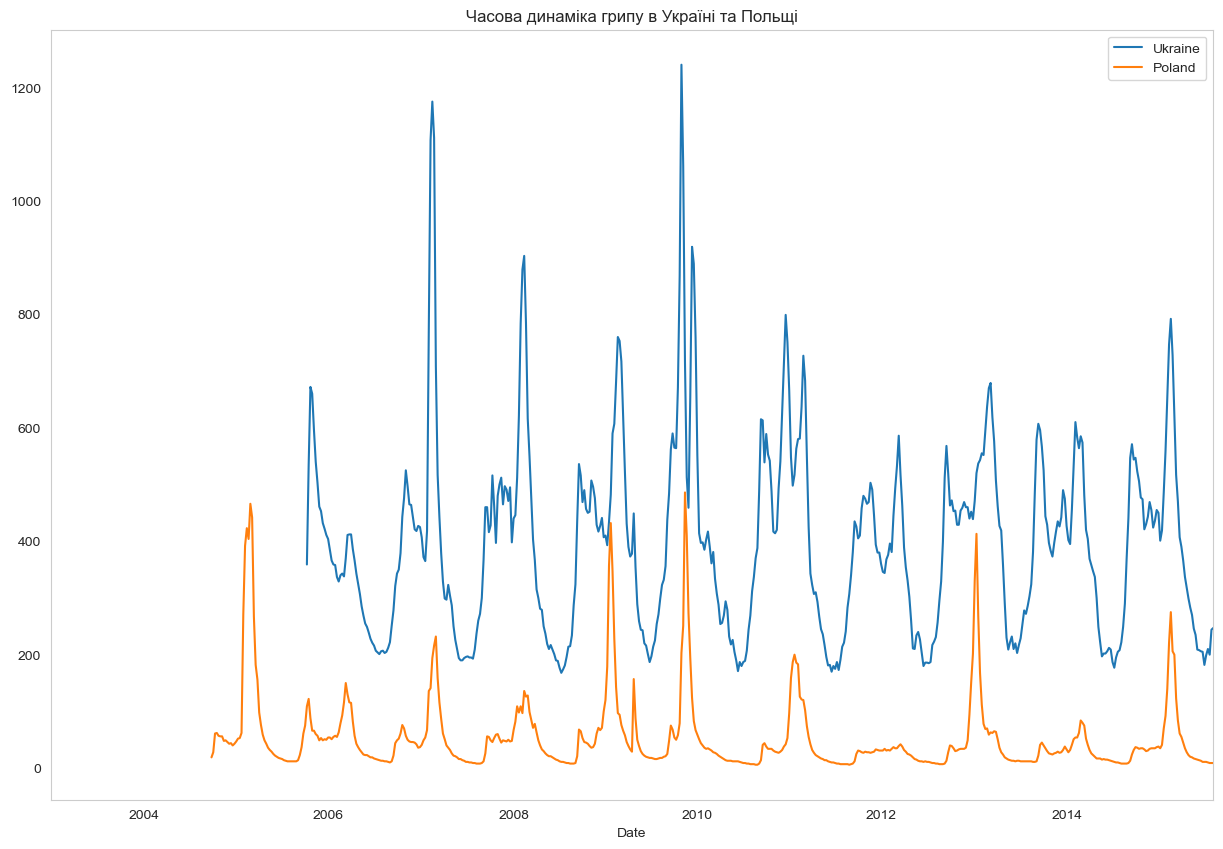

In [4]:
fig, ax = plt.subplots(figsize=(15, 10))

flu_df[['Ukraine', 'Poland']].plot(ax=ax)
plt.title('Часова динаміка грипу в Україні та Польщі')
ax.grid()
plt.show()

Досліджуємо часовий ряд грипу у Польщі:

In [5]:
poland_flu_df = flu_df['Poland']

In [6]:
poland_flu_df.describe()

count    568.000000
mean      53.619718
std       70.330210
min        6.000000
25%       15.000000
50%       33.000000
75%       56.250000
max      486.000000
Name: Poland, dtype: float64

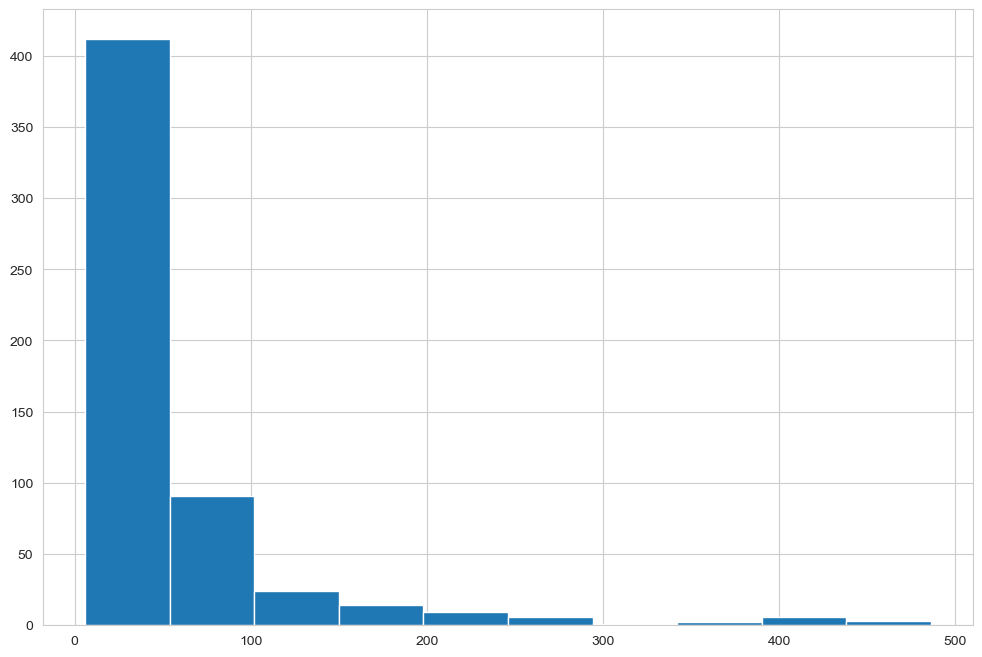

In [7]:
poland_flu_df.hist(figsize=(12, 8));

Для кращої візуалізації властивостей ряду (трендів, сезонності тощо) застосуємо згладжування за допомогою ковзаючого середнього:

In [8]:
def plot_moving_average(series, n):
    rolling_mean = series.rolling(window=n).mean()
    plt.figure(figsize=(15, 5))
    plt.title(f'Moving average\n window size = {n}')
    plt.plot(rolling_mean, c='orange', label='Rolling mean trend')
    plt.plot(series[n:], label='Actual values')
    plt.legend(loc='upper left')
    plt.grid(True)

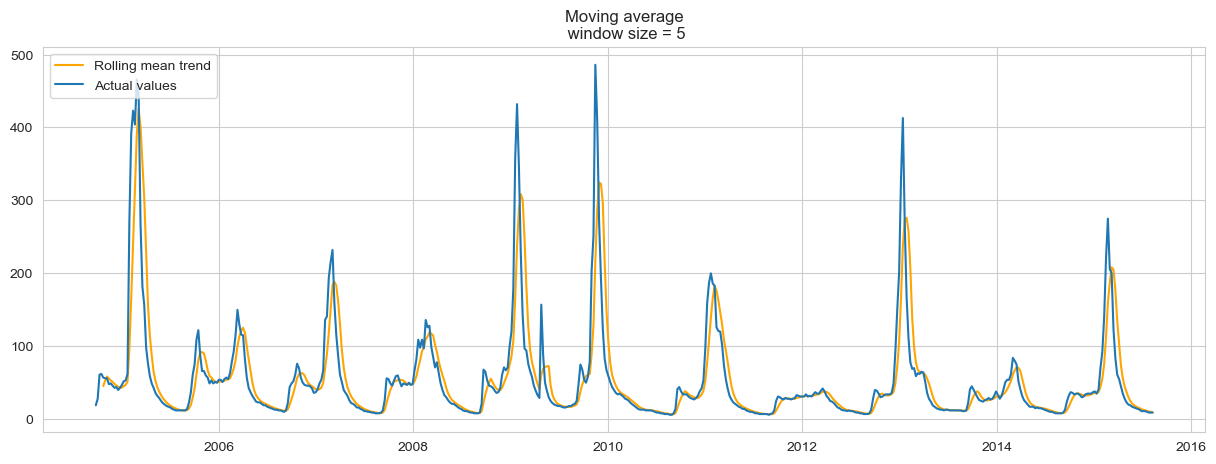

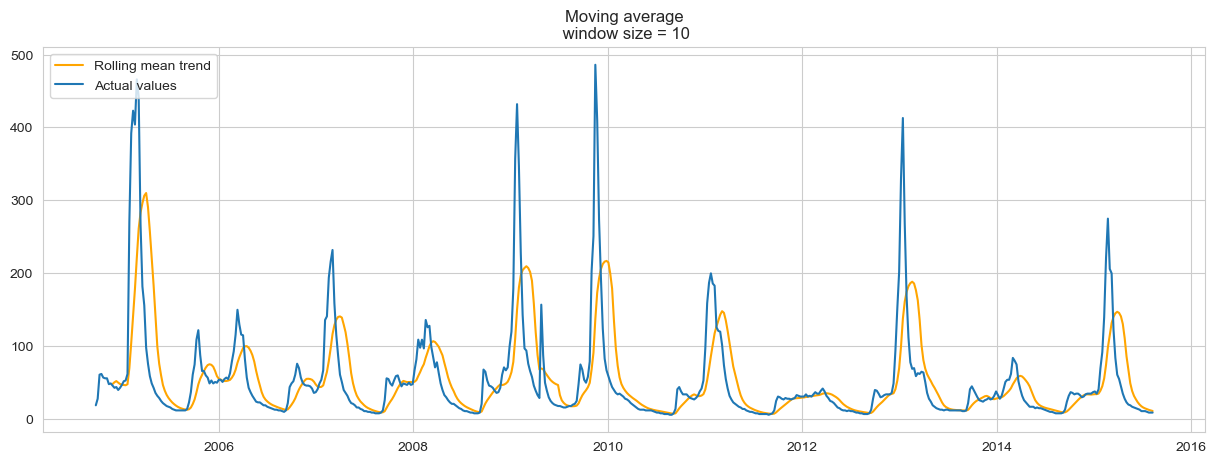

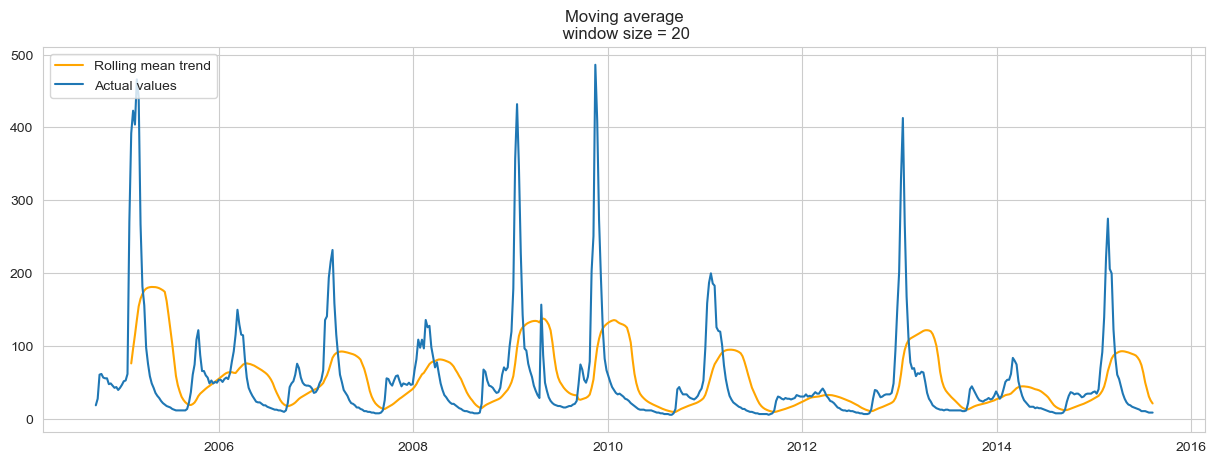

In [9]:
plot_moving_average(poland_flu_df, 5)
plot_moving_average(poland_flu_df, 10)
plot_moving_average(poland_flu_df, 20)

Візуалізуємо декомпозицію ряду на тренд, сезонність та залишки:

In [10]:
decomposition = smt.seasonal_decompose(poland_flu_df[~poland_flu_df.isna()])

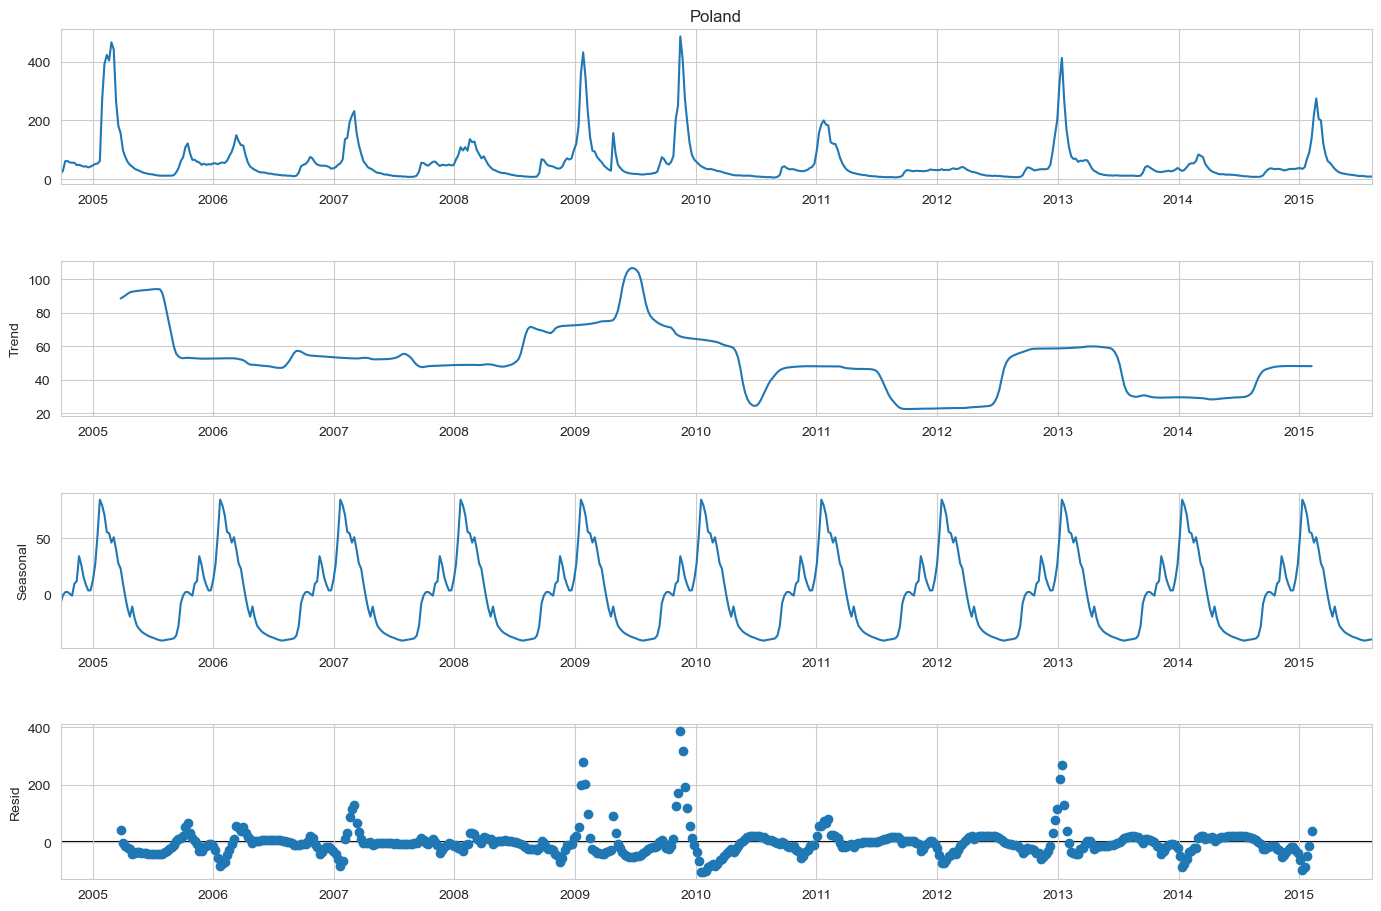

In [11]:
fig = decomposition.plot()

fig.set_size_inches(15, 10)

plt.show()

Будуємо графіки автокореляції та часткової автокореляції:

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


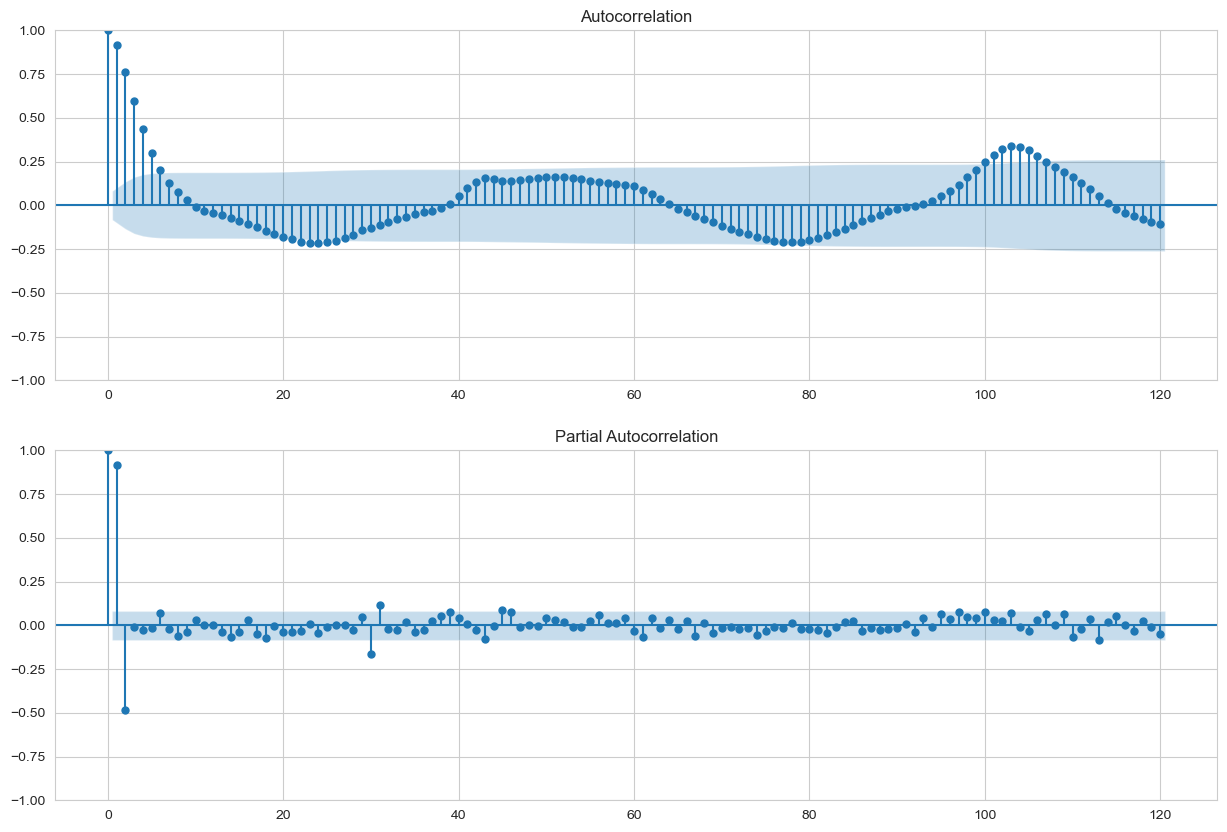

In [12]:
fig, ax = plt.subplots(2, figsize=(15, 10))
ax[0] = plot_acf(poland_flu_df[~poland_flu_df.isna()], ax=ax[0], lags=120)
ax[1] = plot_pacf(poland_flu_df[~poland_flu_df.isna()], ax=ax[1], lags=120)

Перевіримо ряд на стаціонарність за допомогою доповненого тесту Дікі-Фуллера:

In [13]:
def dickey_fuller_test(series):
    test = smt.adfuller(series, autolag='AIC')
    print('adf: ', test[0])
    print('p-value: ', test[1])
    print('Critical values: ', test[4])
    if test[0] > test[4]['5%']:
        print('Навні одиничні корені, ряд не стаціонарний.')
    else:
        print('Одиничні корені відсутні, ряд є стаціонарним.')

dickey_fuller_test(poland_flu_df[~poland_flu_df.isna()])

adf:  -8.105881182661927
p-value:  1.263297670719175e-12
Critical values:  {'1%': -3.441956369604407, '5%': -2.8666599744723045, '10%': -2.5694967895716014}
Одиничні корені відсутні, ряд є стаціонарним.


Будуємо матрицю кореляцій для значень грипу по країнам:

In [14]:
flu_corrmat = flu_df.corr()

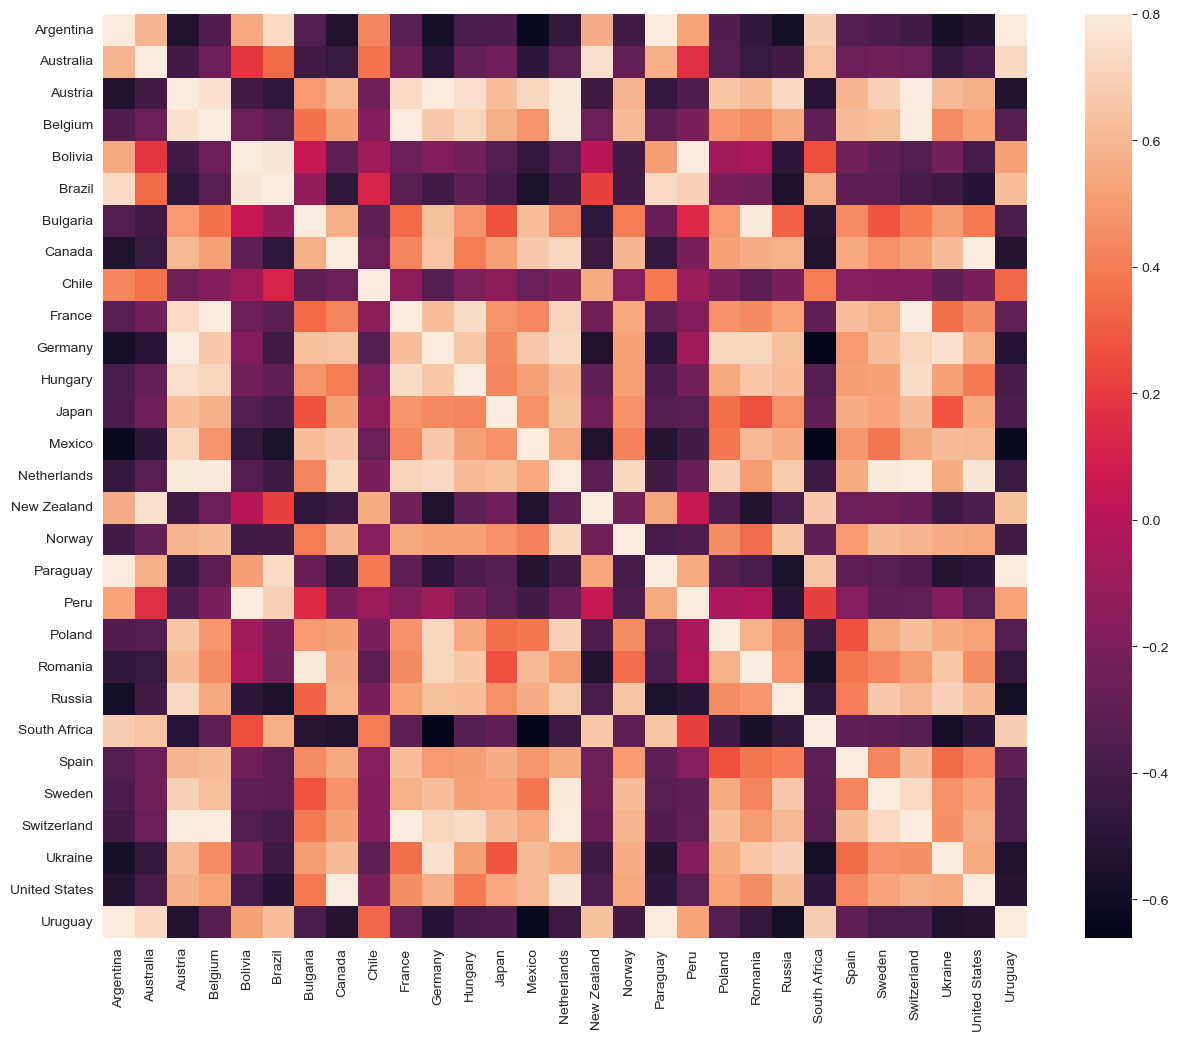

In [15]:
f, ax = plt.subplots(figsize=(15, 12))

sns.heatmap(flu_corrmat, vmax=.8, square=True)

plt.show()

Як можна побачити, позитивно корелюють країни, які знаходяться в одному регіоні, негативно - країни в протилежних півсферах (північна і південна),
наприклад сезон грипу в Україні - осінь-зима, сезон грипу в Південній Африці - літо:

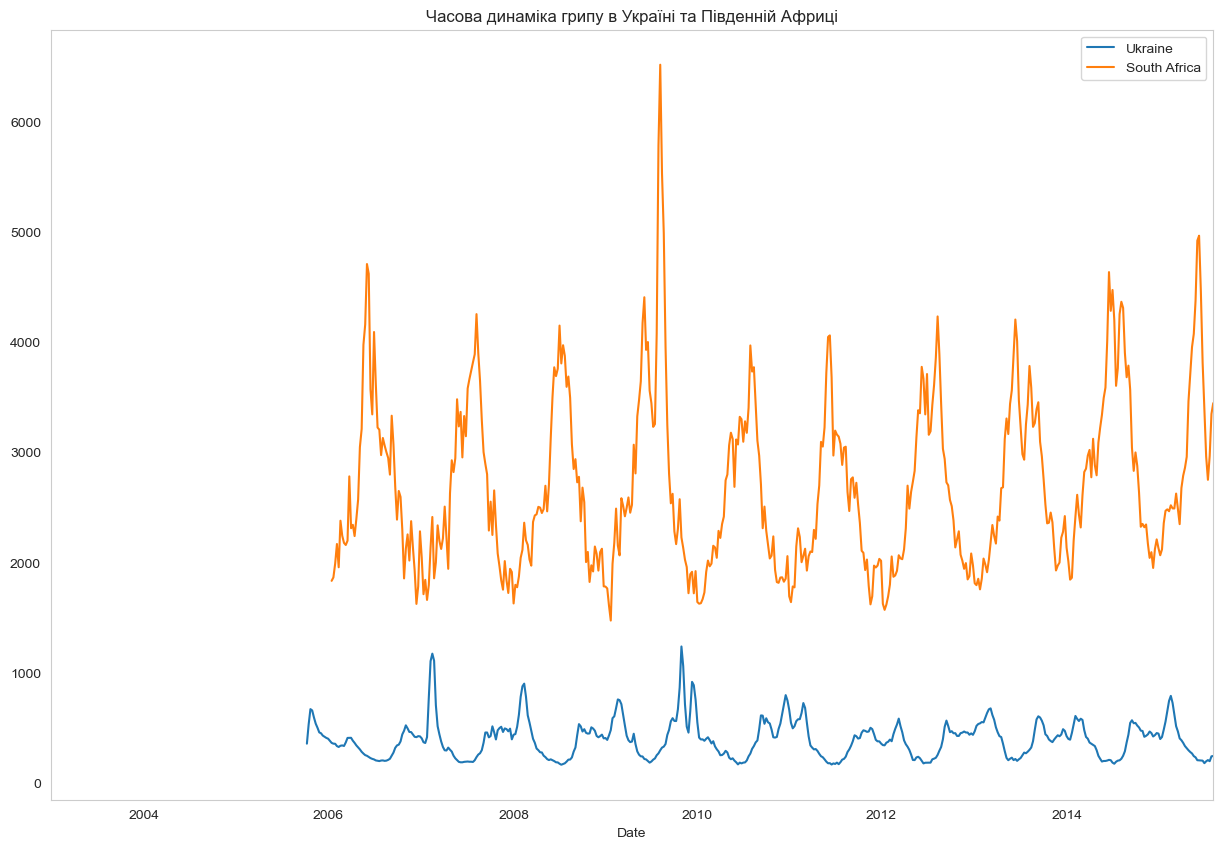

In [16]:
fig, ax = plt.subplots(figsize=(15, 10))

flu_df[['Ukraine', 'South Africa']].plot(ax=ax)
plt.title('Часова динаміка грипу в Україні та Південній Африці')
ax.grid()
plt.show()

<h1>Частина 2</h2>

Зчитуємо дані котировок валют:

In [17]:
currencies_df = pd.read_csv('EUR_USD.csv', index_col=['Date'], parse_dates=['Date'])
currencies_df.sort_index(inplace=True)
currencies_df

,Price,Open,High,Low,Change %
Date,,,,,
2015-09-14,1.1321,1.1338,1.1375,1.1285,-0.17%
2015-09-15,1.1267,1.1313,1.1328,1.1258,-0.48%
2015-09-16,1.1290,1.1267,1.1321,1.1212,0.20%
2015-09-17,1.1437,1.1290,1.1442,1.1284,1.30%
2015-09-18,1.1305,1.1435,1.1460,1.1267,-1.15%
...,...,...,...,...,...
2018-10-08,1.1492,1.1520,1.1536,1.1459,-0.28%
2018-10-09,1.1490,1.1491,1.1504,1.1430,-0.02%
2018-10-10,1.1520,1.1491,1.1547,1.1479,0.26%


Будуємо динаміку ціни, найвищої та найнижчої за добу:

C:\Users\dmitr\AppData\Local\Temp\ipykernel_67504\3493338801.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  currencies_df[['Price', 'High', 'Low']].plot(ax=ax, subplots=True)


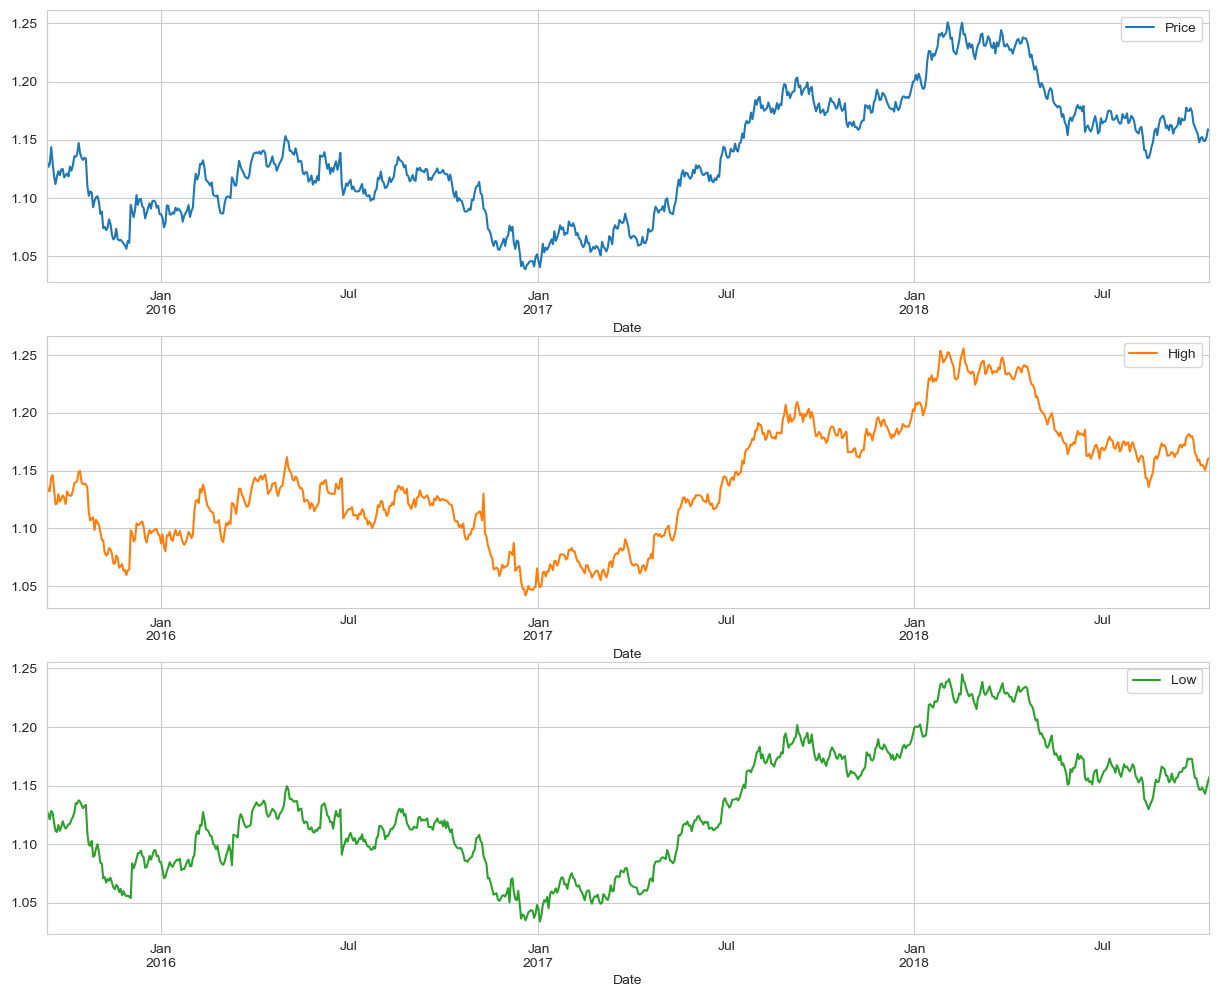

In [18]:
fig, ax = plt.subplots(figsize=(15, 12))

currencies_df[['Price', 'High', 'Low']].plot(ax=ax, subplots=True)
ax.grid()
plt.show()

Використовуємо згладжування для дослідження характеристик рядів:

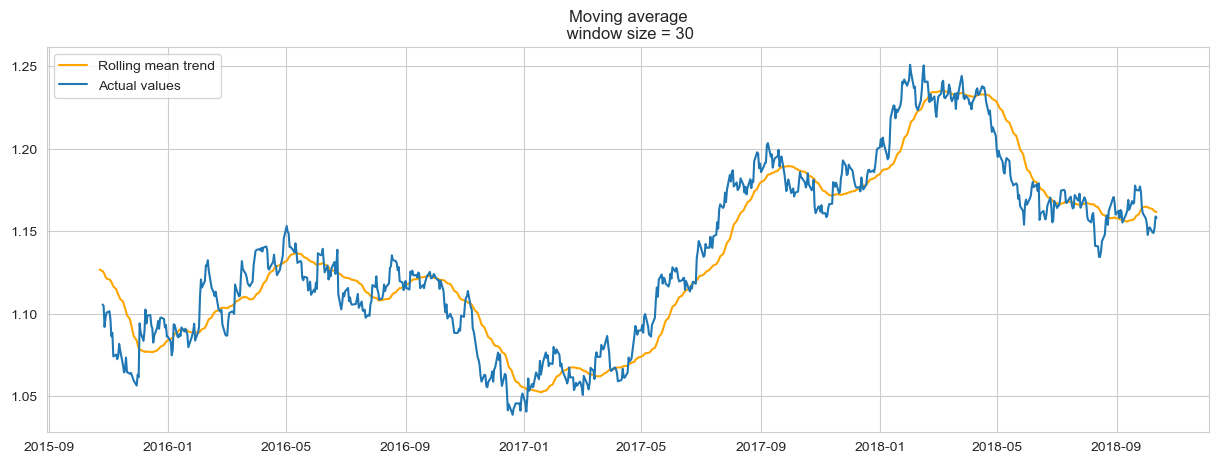

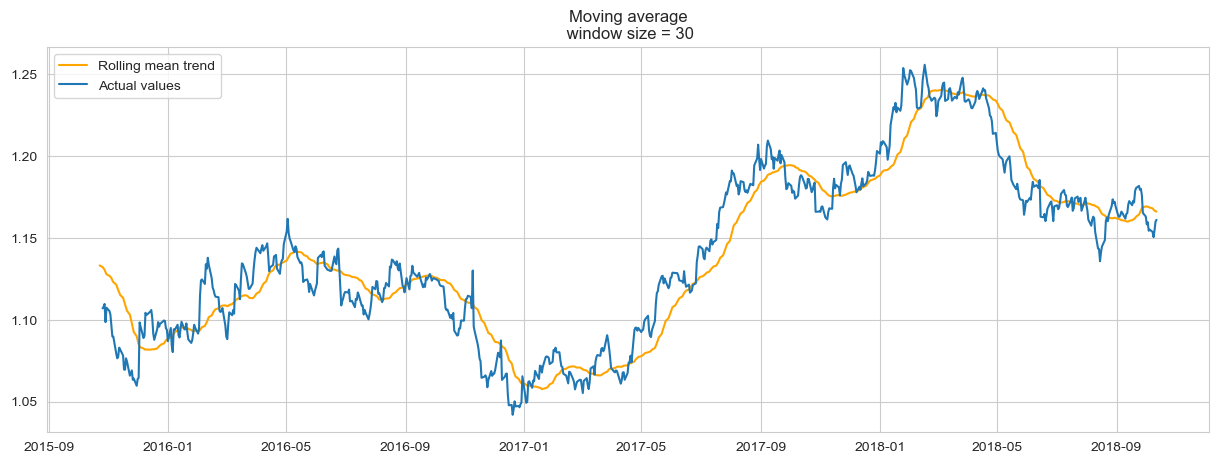

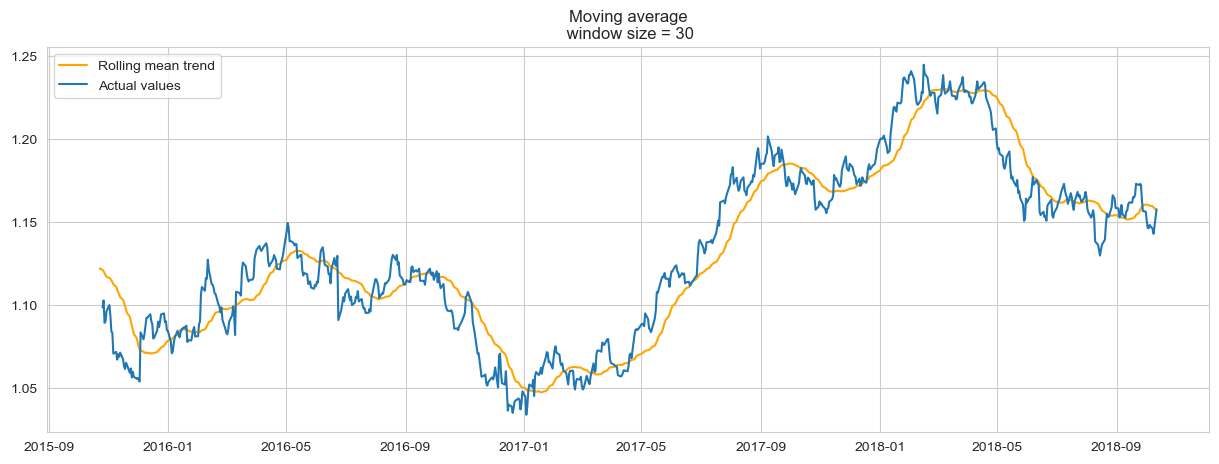

In [19]:
plot_moving_average(currencies_df['Price'], 30)
plot_moving_average(currencies_df['High'], 30)
plot_moving_average(currencies_df['Low'], 30)

Створюємо декомпозицію ціни на тренд, сезонність і залишки:

In [33]:
currencies_df.index

DatetimeIndex(['2015-09-14', '2015-09-15', '2015-09-16', '2015-09-17',
               '2015-09-18', '2015-09-21', '2015-09-22', '2015-09-23',
               '2015-09-24', '2015-09-25',
               ...
               '2018-10-01', '2018-10-02', '2018-10-03', '2018-10-04',
               '2018-10-05', '2018-10-08', '2018-10-09', '2018-10-10',
               '2018-10-11', '2018-10-12'],
              dtype='datetime64[ns]', name='Date', length=805, freq=None)

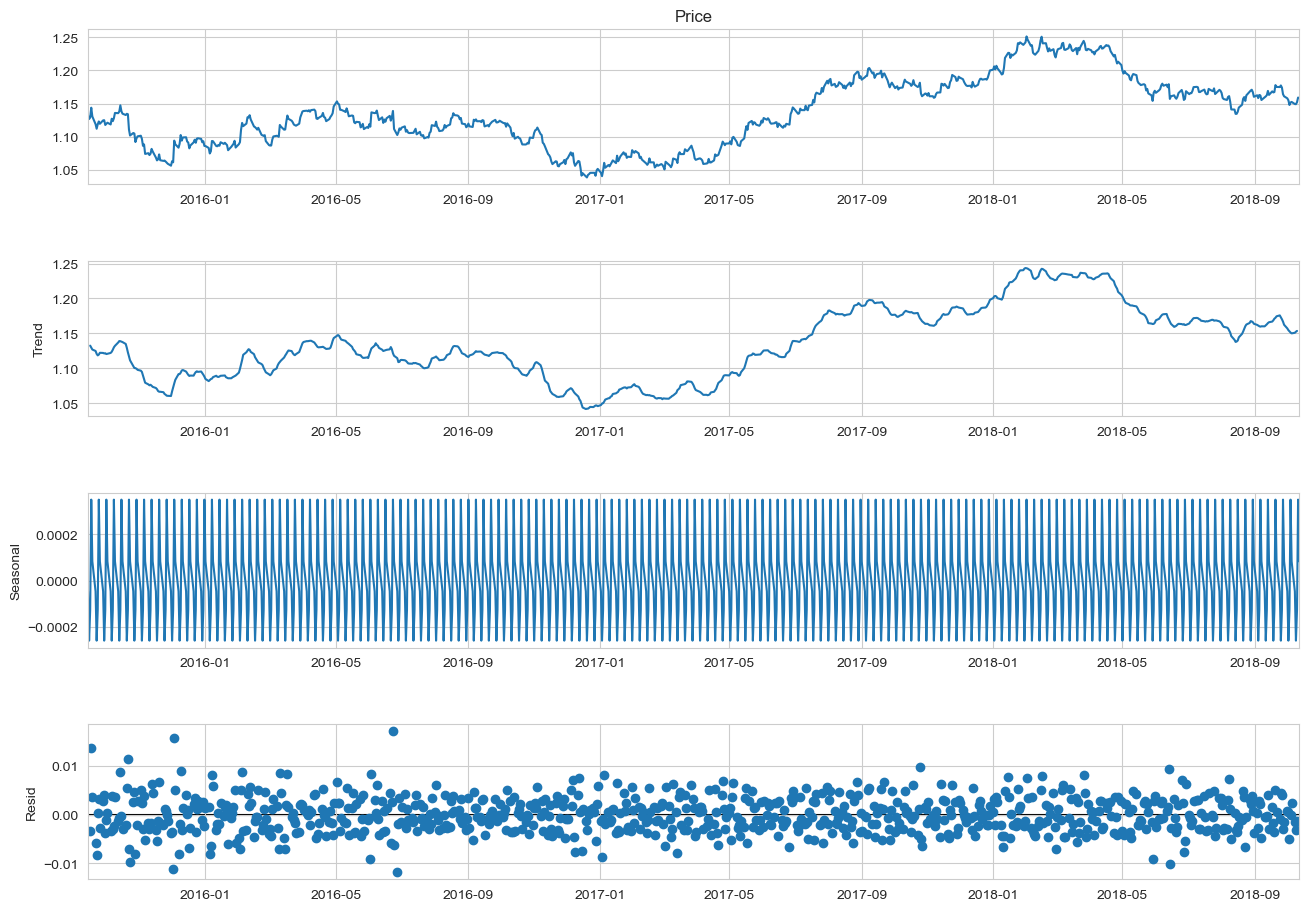

In [20]:
price_decomposition = smt.seasonal_decompose(currencies_df['Price'])

fig = price_decomposition.plot()

fig.set_size_inches(15, 10)

plt.show()

Як бачимо, ряд не має чіткого тренду та сезонності.

Будуємо графіки автокореляції та часткової автокореляції:

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


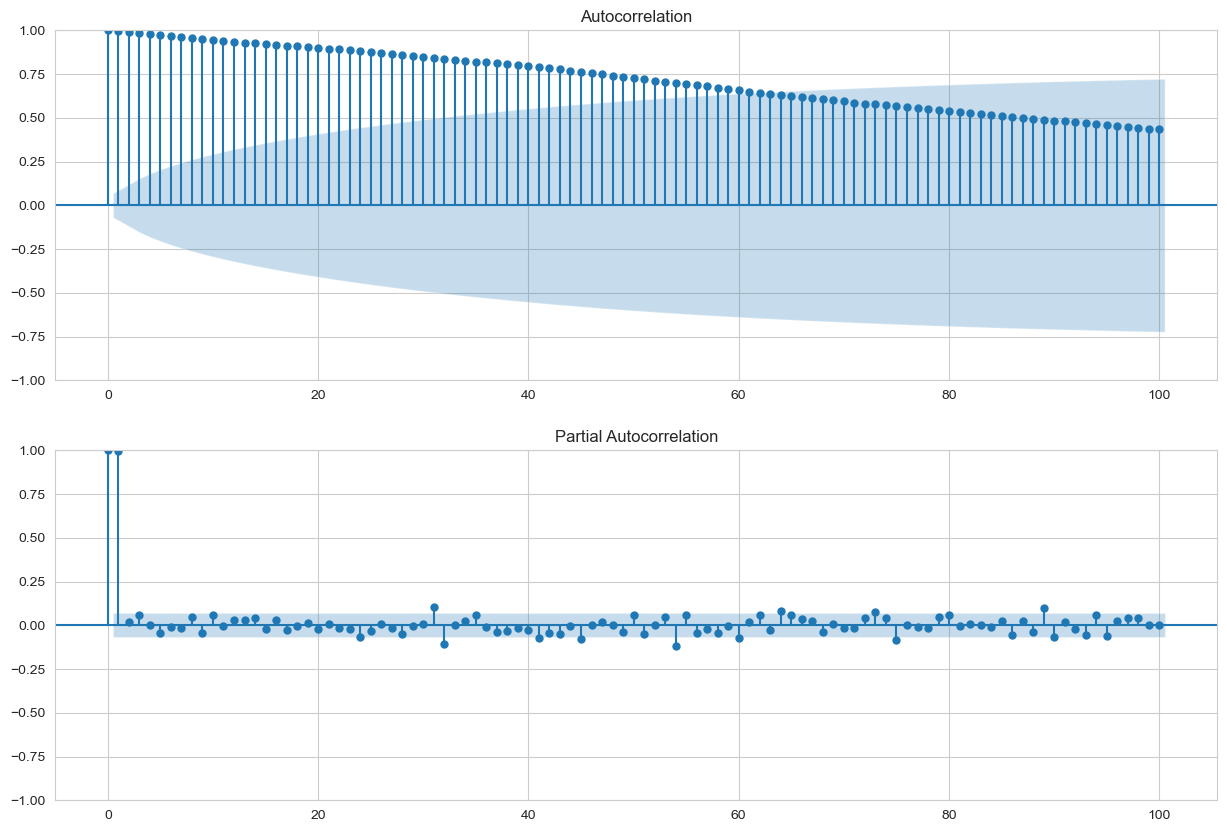

In [21]:
fig, ax = plt.subplots(2, figsize=(15, 10))
ax[0] = plot_acf(currencies_df['Price'], ax=ax[0], lags=100)
ax[1] = plot_pacf(currencies_df['Price'], ax=ax[1], lags=100)

Перевіряємо ряд на стаціонарність:

In [22]:
dickey_fuller_test(currencies_df['Price'])

adf:  -1.5379317587162271
p-value:  0.5146706141671892
Critical values:  {'1%': -3.4385095783477877, '5%': -2.865141527500859, '10%': -2.5686877783346946}
Навні одиничні корені, ряд не стаціонарний.


Для того, щоб зробити ряд стаціонарним, використаємо різницю:

In [23]:
currencies_price_df_diff = currencies_df['Price'].diff(periods=1).dropna()

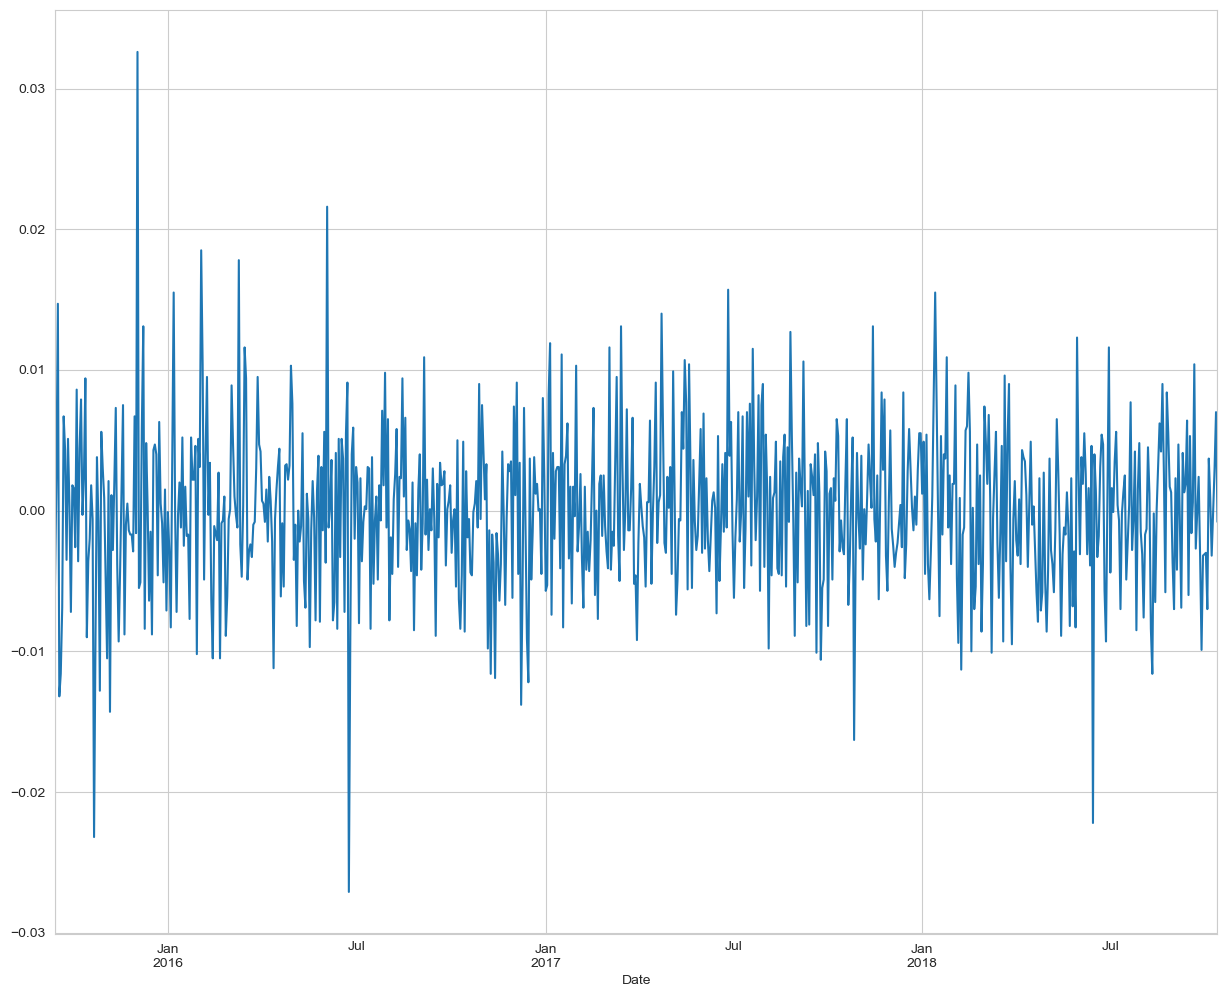

In [24]:
fig, ax = plt.subplots(figsize=(15, 12))

currencies_price_df_diff.plot(ax=ax)

plt.show()

In [25]:
dickey_fuller_test(currencies_price_df_diff)

adf:  -28.93859609311645
p-value:  0.0
Critical values:  {'1%': -3.4385197724757233, '5%': -2.8651460209504114, '10%': -2.5686901720199313}
Одиничні корені відсутні, ряд є стаціонарним.


Різниця представляє собою стаціонарний ряд.

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


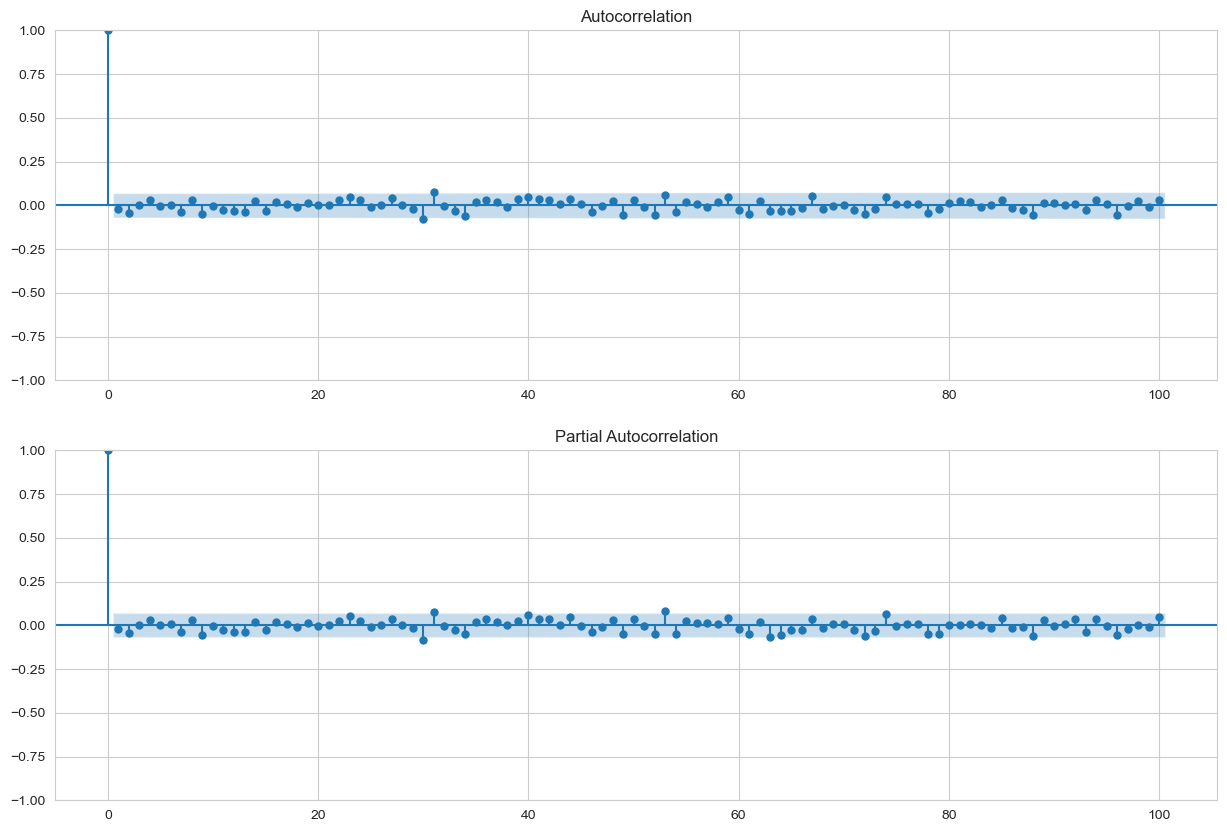

In [26]:
fig, ax = plt.subplots(2, figsize=(15, 10))
ax[0] = plot_acf(currencies_price_df_diff, ax=ax[0], lags=100)
ax[1] = plot_pacf(currencies_price_df_diff, ax=ax[1], lags=100)

Будуємо модель ARIMA для прогнозу значення ціни на тиждень вперед:

In [27]:
train_data = currencies_df['Price'][:-7]
model = smt.ARIMA(train_data, order=(1, 1, 1)).fit()

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


In [28]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                  798
Model:                 ARIMA(1, 1, 1)   Log Likelihood                2992.286
Date:                Sun, 14 May 2023   AIC                          -5978.571
Time:                        16:27:52   BIC                          -5964.529
Sample:                    09-14-2015   HQIC                         -5973.176
                         - 10-03-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3473      1.337      0.260      0.795      -2.274       2.968
ma.L1         -0.3704      1.328     -0.279      0.780      -2.974       2.233
sigma2      3.206e-05    1.1e-06     29.258      0.000    2.99e-05    3.42e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               187.01
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.68   Skew:                             0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
pred = model.predict(currencies_df['Price'].index[-7], currencies_df['Price'].index[-1])
test_data = currencies_price_df_diff[-7:]

Візуалізуємо прогноз та істинні значення:

In [34]:
type(model)

statsmodels.tsa.arima.model.ARIMAResultsWrapper

<Axes: xlabel='Date'>

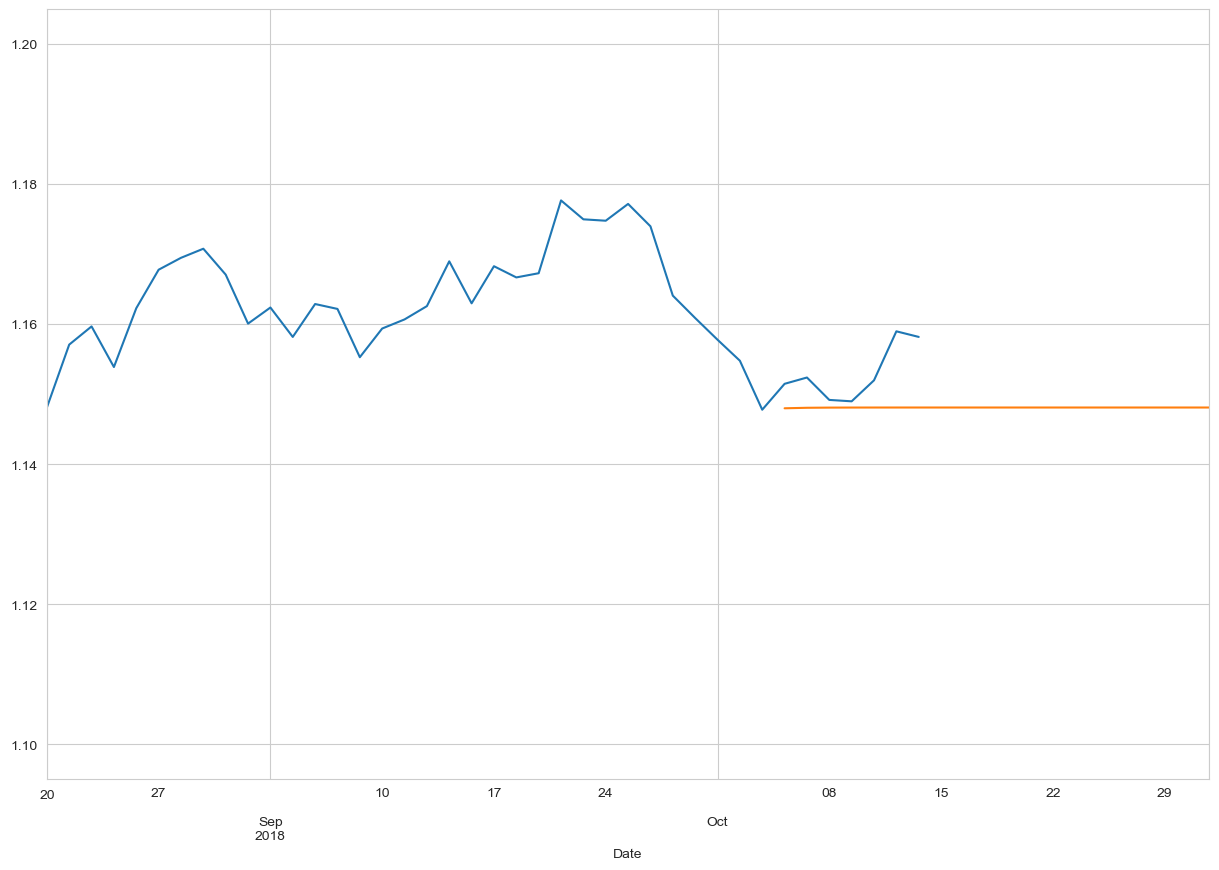

In [32]:
fig, ax = plt.subplots(figsize=(15, 10))
currencies_df['Price'][-40:].plot(ax=ax)
ax.vlines(currencies_df['Price'].index[-7], 1.1, 1.2, linestyle='--', color='r', label='Start of forecast')
# plt.vlines(currencies_df['Price'].index[-7], 1.1, 1.2, linestyle='--', color='r', label='Start of forecast')
predictions = model.forecast(20)
predictions.plot(ax=ax)

Значення прогнозів:

In [31]:
forecasts = model.forecast(7)
forecasts

2018-10-04    1.148006
2018-10-05    1.148077
2018-10-08    1.148102
2018-10-09    1.148110
2018-10-10    1.148113
2018-10-11    1.148114
2018-10-12    1.148115
Freq: B, Name: predicted_mean, dtype: float64